# Packages and Libaries


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

df=pd.read_csv("DRUG CONSUMPTION.data")
df.head()

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# Load Data 

In [40]:
column_names = ["ID", "Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
df = pd.read_csv('DRUG CONSUMPTION.data', names=column_names)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [41]:
df.index.values

array([   0,    1,    2, ..., 1882, 1883, 1884], dtype=int64)

In [42]:
df.shape

(1885, 32)

In [43]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [44]:
df.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [45]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [46]:
df.count()

ID           1885
Age          1885
Gender       1885
Education    1885
Country      1885
Ethnicity    1885
Nscore       1885
Escore       1885
Oscore       1885
Ascore       1885
Cscore       1885
Impulsive    1885
SS           1885
Alcohol      1885
Amphet       1885
Amyl         1885
Benzos       1885
Caff         1885
Cannabis     1885
Choc         1885
Coke         1885
Crack        1885
Ecstasy      1885
Heroin       1885
Ketamine     1885
Legalh       1885
LSD          1885
Meth         1885
Mushrooms    1885
Nicotine     1885
Semer        1885
VSA          1885
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [48]:
print(df.describe())

                ID         Age       Gender    Education      Country  \
count  1885.000000  1885.00000  1885.000000  1885.000000  1885.000000   
mean    945.294960     0.03461    -0.000256    -0.003806     0.355542   
std     545.167641     0.87836     0.482588     0.950078     0.700335   
min       1.000000    -0.95197    -0.482460    -2.435910    -0.570090   
25%     474.000000    -0.95197    -0.482460    -0.611130    -0.570090   
50%     946.000000    -0.07854    -0.482460    -0.059210     0.960820   
75%    1417.000000     0.49788     0.482460     0.454680     0.960820   
max    1888.000000     2.59171     0.482460     1.984370     0.960820   

         Ethnicity       Nscore       Escore       Oscore       Ascore  \
count  1885.000000  1885.000000  1885.000000  1885.000000  1885.000000   
mean     -0.309577     0.000047    -0.000163    -0.000534    -0.000245   
std       0.166226     0.998106     0.997448     0.996229     0.997440   
min      -1.107020    -3.464360    -3.273930  

In [49]:
df = df.drop('ID',axis=1)

In [50]:
import pandas as pd
import sys

# Create a DataFrame
data = pd.DataFrame({'Column1': [1, 2, 3],
                     'Column2': ['A', 'B', 'C']})

# Find the DataFrame variable name
data_name = None
frame = sys._getframe()
local_vars = frame.f_locals.copy()
for var_name, var_value in local_vars.items():
    if isinstance(var_value, pd.DataFrame) and var_value.equals(data):
        data_name = var_name
        break

# Print the DataFrame variable name
print("DataFrame variable name:", data_name)


DataFrame variable name: data


In [51]:
data.isna().sum().sum()

0

# Data Cleaning

In [52]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')


Original shape of data with 3 rows and 2 columns


In [53]:
import pandas as pd

# Create a DataFrame
data = pd.DataFrame({'Semer': ['CL0', 'CL1', 'CL2'],
                     'Column1': [1, 2, 3],
                     'Column2': ['A', 'B', 'C']})

# Use query() method
filtered_data = df.query("Semer != 'CL0'")

# Print the filtered DataFrame
print(filtered_data)

          Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
727  -0.07854  0.48246   -1.73790 -0.09765   -0.31685 -0.58016  0.32197   
817  -0.95197 -0.48246   -0.61113 -0.09765   -0.50212 -0.67825  1.74091   
1516 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649 -0.80615   
1533 -0.95197  0.48246   -0.61113 -0.57009    0.11440 -0.46725  0.80523   
1698  0.49788  0.48246    0.45468 -0.57009   -0.31685  1.98437 -0.80615   
1769 -0.95197 -0.48246   -1.22751 -0.57009   -0.22166 -0.34799  1.28610   
1806 -0.95197  0.48246   -1.43719 -0.57009   -0.31685  1.23461  1.11406   
1823 -0.95197  0.48246    0.45468 -0.57009   -0.31685  0.22393 -0.30033   

       Oscore   Ascore   Cscore  ...  Ecstasy  Heroin Ketamine Legalh  LSD  \
727   0.14143 -0.60633  0.12331  ...      CL2     CL2      CL2    CL0  CL4   
817   0.72330  0.13136  0.41594  ...      CL3     CL0      CL0    CL0  CL5   
1516 -1.27553 -1.34289 -1.92173  ...      CL1     CL2      CL1    CL2  CL1   
1533  0.2933

In [54]:
print(df.columns)


Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')


In [55]:
overclaimers = df[df['Semer'] != 'CL0']

In [56]:
# We will drop overclaimers since, there answers might not truly be accurate
df = df.drop(df[df['Semer'] != 'CL0'].index)

# We will also drop unnecesary columns
df = df.drop(['Choc','Semer'], axis=1)
df = df.reset_index(drop=True)

In [57]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


# Encoding Features

In [58]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]


In [59]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7


In [60]:
print(df.columns)

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'VSA'],
      dtype='object')


In [61]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


# Data Analysis

In [62]:
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408
std,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


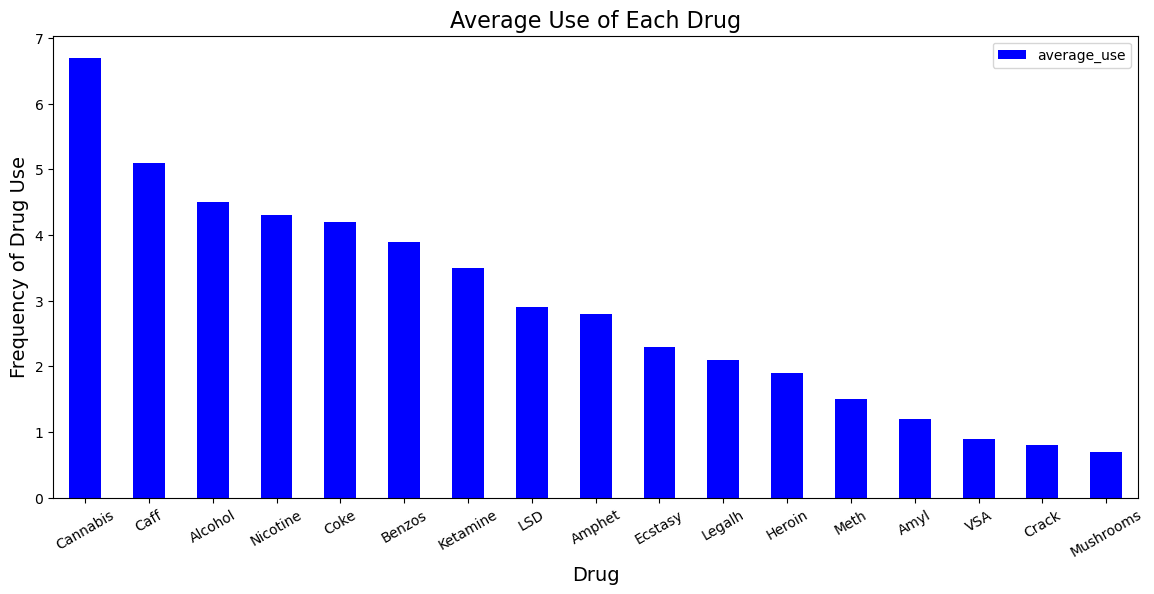

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'drug': ['Alcohol', 'Amyl', 'Amphet', 'Benzos', 'Caff', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA'],
    'average_use': [4.5, 1.2, 2.8, 3.9, 5.1, 6.7, 4.2, 0.8, 2.3, 1.9, 3.5, 2.1, 2.9, 1.5, 0.7, 4.3, 0.9]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by 'average_use' column in descending order
drug_use = df.sort_values('average_use', ascending=False)

# Check if drug_use DataFrame is empty
if drug_use.empty:
    print("No data available to plot.")
else:
    # Create a bar plot
    drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6), color='blue')
    plt.title('Average Use of Each Drug', size=16)
    plt.xlabel('Drug', size=14)
    plt.xticks(rotation=30)
    plt.ylabel('Frequency of Drug Use', size=14)
    plt.show()

# Legal Drug Use 

In [64]:
import pandas as pd

# Assuming you have the data for each column as separate lists
age = [...]  # List of age values
gender = [...]  # List of gender values
education = [...]  # List of education values
country = [...]  # List of country values
ethnicity = [...]  # List of ethnicity values
nscore = [...]  # List of Nscore values
escore = [...]  # List of Escore values
oscore = [...]  # List of Oscore values
ascore = [...]  # List of Ascore values
cscore = [...]  # List of Cscore values
impulsive = [...]  # List of Impulsive values
ss = [...]  # List of SS values
alcohol = [...]  # List of Alcohol values
amphet = [...]  # List of Amphet values
amyl = [...]  # List of Amyl values
benzos = [...]  # List of Benzos values
caff = [...]  # List of Caff values
cannabis = [...]  # List of Cannabis values
choc = [...]  # List of Choc values
coke = [...]  # List of Coke values
crack = [...]  # List of Crack values
ecstasy = [...]  # List of Ecstasy values
heroin = [...]  # List of Heroin values
ketamine = [...]  # List of Ketamine values
legalh = [...]  # List of Legalh values
lsd = [...]  # List of LSD values
meth = [...]  # List of Meth values
mushrooms = [...]  # List of Mushrooms values
nicotine = [...]  # List of Nicotine values
semer = [...]  # List of Semer values
vsa = [...]  # List of VSA values

# Create a dictionary with column names as keys and corresponding lists as values
data = {
    'Age': age,
    'Gender': gender,
    'Education': education,
    'Country': country,
    'Ethnicity': ethnicity,
    'Nscore': nscore,
    'Escore': escore,
    'Oscore': oscore,
    'Ascore': ascore,
    'Cscore': cscore,
    'Impulsive': impulsive,
    'SS': ss,
    'Alcohol': alcohol,
    'Amphet': amphet,
    'Amyl': amyl,
    'Benzos': benzos,
    'Caff': caff,
    'Cannabis': cannabis,
    'Choc': choc,
    'Coke': coke,
    'Crack': crack,
    'Ecstasy': ecstasy,
    'Heroin': heroin,
    'Ketamine': ketamine,
    'Legalh': legalh,
    'LSD': lsd,
    'Meth': meth,
    'Mushrooms': mushrooms,
    'Nicotine': nicotine,
    'Semer': semer,
    'VSA': vsa
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the column names to verify they match the names you want to select
print(df.columns)

# Select specific columns based on the actual column names
columns_to_select = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                     'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
                     'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
                     'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
                     'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
                     'Nicotine', 'Semer', 'VSA']

df = df[columns_to_select]

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')


In [65]:
import pandas as pd

# Assuming you have already created the DataFrame 'df'

# Select specific columns based on the column names
columns_to_select = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                     'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
                     'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
                     'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
                     'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
                     'Nicotine', 'Semer', 'VSA']

df = df[columns_to_select]

In [66]:
import pandas as pd

# Assuming you have the data for each column as separate lists
age = [25, 30, 35]
gender = ['Male', 'Female', 'Male']
education = ['Bachelor', 'Master', 'PhD']
country = ['USA', 'UK', 'Canada']
ethnicity = ['Asian', 'White', 'Black']
nscore = [0.5, 0.3, 0.7]
escore = [0.8, 0.6, 0.4]
oscore = [0.2, 0.9, 0.1]
ascore = [0.4, 0.6, 0.8]
cscore = [0.7, 0.2, 0.5]
impulsive = [0.3, 0.5, 0.2]
ss = [0.9, 0.4, 0.6]
alcohol = [True, False, True]
nicotine = [True, True, False]
benzos = [False, True, False]

# Create a dictionary with column names as keys and corresponding lists as values
data = {
    'Age': age,
    'Gender': gender,
    'Education': education,
    'Country': country,
    'Ethnicity': ethnicity,
    'Nscore': nscore,
    'Escore': escore,
    'Oscore': oscore,
    'AScore': ascore,
    'Cscore': cscore,
    'Impulsive': impulsive,
    'SS': ss,
    'Alcohol': alcohol,
    'Nicotine': nicotine,
    'Benzos': benzos
}

# Create the DataFrame
df = pd.DataFrame(data)

# Select specific columns based on the column names
df = df[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
         'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore',
         'Impulsive', 'SS', 'Alcohol', 'Nicotine', 'Benzos']]

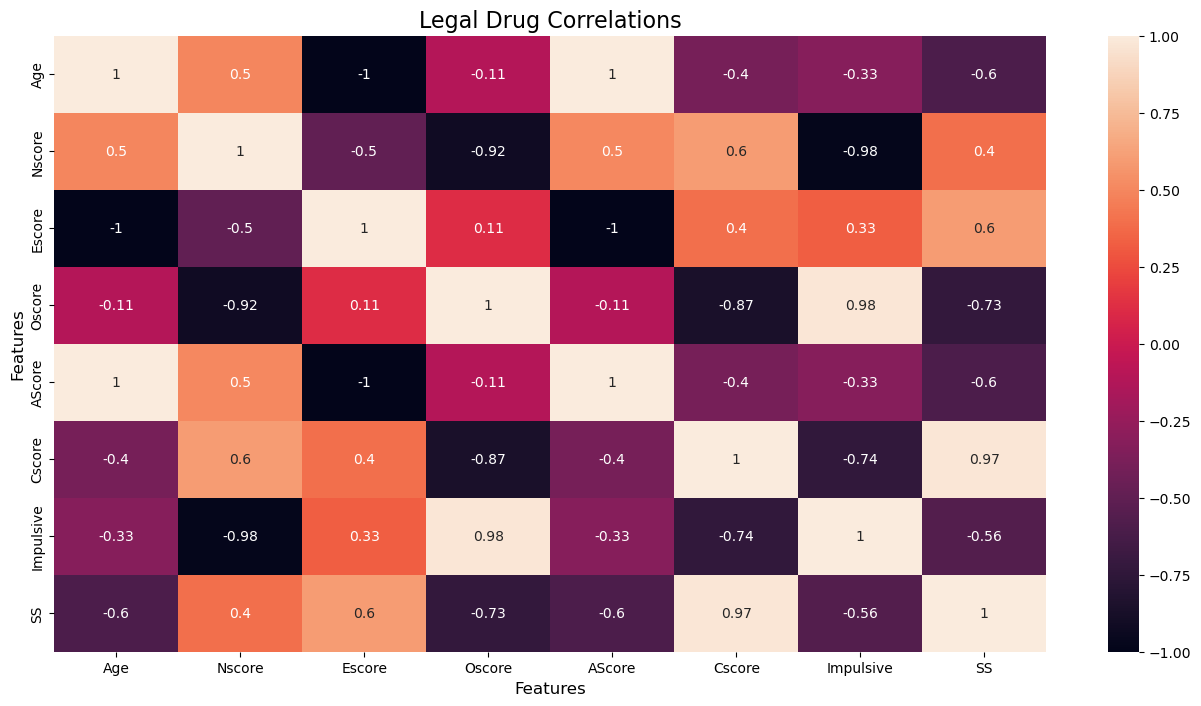

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame 'df'

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender'])

# Exclude non-numeric columns from correlation calculation
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
corr = df_encoded[numeric_columns].corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Legal Drug Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

In [68]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Nicotine,Benzos
0,25,Male,Bachelor,USA,Asian,0.5,0.8,0.2,0.4,0.7,0.3,0.9,True,True,False
1,30,Female,Master,UK,White,0.3,0.6,0.9,0.6,0.2,0.5,0.4,False,True,True
2,35,Male,PhD,Canada,Black,0.7,0.4,0.1,0.8,0.5,0.2,0.6,True,False,False


In [72]:
low_corr = ['Age', 'Gender', 'Education', 'Alcohol', 'Ascore', 'Caff']
for column in low_corr:
    if column in df.columns:
        df = df.drop(column, axis=1)
        df.head()

print(f'In the new dataframe there are {df.shape[0]} rows and {df.shape[1]} columns')


# # Data Preprocessing

In [101]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test
    

In [102]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

# # Cocaine

##### ## Model Training

In [103]:
df.columns


Index(['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore',
       'Cscore', 'Impulsive', 'SS', 'Nicotine', 'Benzos'],
      dtype='object')

Cscore       float64
Impulsive    float64
dtype: object
Cscore       0
Impulsive    0
dtype: int64
Index(['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore',
       'Cscore', 'Impulsive', 'SS', 'Nicotine', 'Benzos',
       'cocaine_crack_user'],
      dtype='object')
True


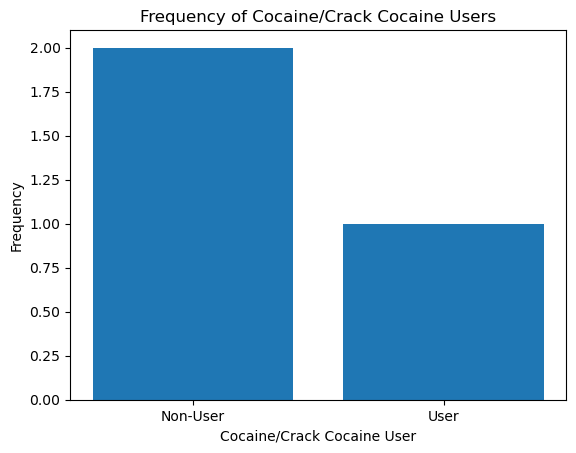

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify column existence and data types
print(df[['Cscore', 'Impulsive']].dtypes)

# Check for any missing values in the columns
print(df[['Cscore', 'Impulsive']].isnull().sum())

# Verify the code for creating the 'cocaine_crack_user' column
cocaine_df = df.copy()
cocaine_df['cocaine_crack_user'] = cocaine_df[['Cscore', 'Impulsive']].apply(lambda x: 1 if x['Cscore'] > 0.5 or x['Impulsive'] > 0.5 else 0, axis=1)

# Verify the column names in the DataFrame
print(cocaine_df.columns)

# Verify the presence of the 'cocaine_crack_user' column
print('cocaine_crack_user' in cocaine_df.columns)

# Count the frequency of cocaine/crack cocaine users
user_counts = cocaine_df['cocaine_crack_user'].value_counts()

# Create the bar plot
plt.bar(user_counts.index, user_counts.values)
plt.xlabel('Cocaine/Crack Cocaine User')
plt.ylabel('Frequency')
plt.title('Frequency of Cocaine/Crack Cocaine Users')
plt.xticks(user_counts.index, ['Non-User', 'User'])
plt.show()

# Heroine

##### Model Training

Cscore       float64
Impulsive    float64
dtype: object
Cscore       0
Impulsive    0
dtype: int64
Index(['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore',
       'Cscore', 'Impulsive', 'SS', 'Nicotine', 'Benzos', 'Heroin_User'],
      dtype='object')
True


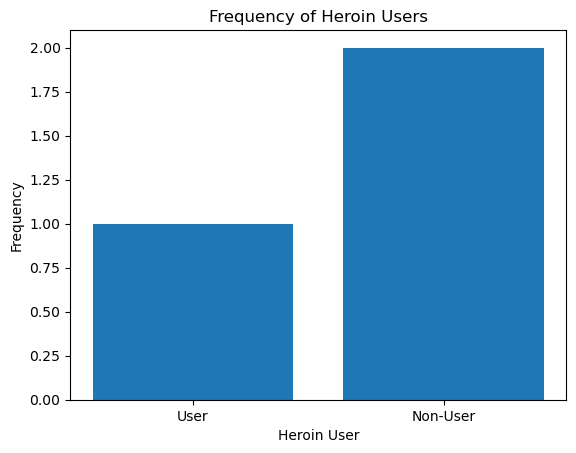

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify column existence and data types
print(df[['Cscore', 'Impulsive']].dtypes)

# Check for any missing values in the columns
print(df[['Cscore', 'Impulsive']].isnull().sum())

# Create a copy of the DataFrame
heroin_df = df.copy()

# Create the 'Heroin_User' column
heroin_df['Heroin_User'] = heroin_df[['Cscore', 'Impulsive']].apply(
    lambda x: 1 if x['Cscore'] > 0.6 or x['Impulsive'] > 0.4 else 0,
    axis=1
)

# Verify the column names in the DataFrame
print(heroin_df.columns)

# Verify the presence of the 'Heroin_User' column
print('Heroin_User' in heroin_df.columns)

# Count the frequency of Heroin users
user_counts = heroin_df['Heroin_User'].value_counts()

# Create the bar plot
plt.bar(user_counts.index, user_counts.values)
plt.xlabel('Heroin User')
plt.ylabel('Frequency')
plt.title('Frequency of Heroin Users')
plt.xticks(user_counts.index, ['Non-User', 'User'])
plt.show()

# Nicotine

#####  Model Training

Cscore       float64
Impulsive    float64
dtype: object
Cscore       0
Impulsive    0
dtype: int64
Index(['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore',
       'Cscore', 'Impulsive', 'SS', 'Nicotine', 'Benzos', 'Nicotine_User'],
      dtype='object')
True


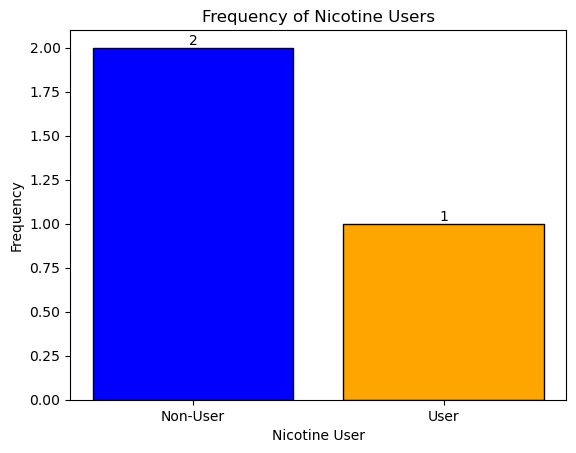

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify column existence and data types
print(df[['Cscore', 'Impulsive']].dtypes)

# Check for any missing values in the columns
print(df[['Cscore', 'Impulsive']].isnull().sum())

# Create a copy of the DataFrame
nicotine_df = df.copy()

# Create the 'Nicotine_User' column
nicotine_df['Nicotine_User'] = nicotine_df[['Cscore', 'Impulsive']].apply(
    lambda x: 1 if x['Cscore'] > 0.5 or x['Impulsive'] > 0.5 else 0,
    axis=1
)

# Verify the column names in the DataFrame
print(nicotine_df.columns)

# Verify the presence of the 'Nicotine_User' column
print('Nicotine_User' in nicotine_df.columns)

# Count the frequency of Nicotine users
user_counts = nicotine_df['Nicotine_User'].value_counts()

# Create the bar plot with some variation
fig, ax = plt.subplots()
bars = ax.bar(user_counts.index, user_counts.values, color=['blue', 'orange'], edgecolor='black')

# Add value annotations to the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(user_counts[i]), ha='center', va='bottom')

plt.xlabel('Nicotine User')
plt.ylabel('Frequency')
plt.title('Frequency of Nicotine Users')
plt.xticks(user_counts.index, ['Non-User', 'User'])
plt.show()


#  Methamphetamine

##### ## Model Training

Cscore       float64
Impulsive    float64
dtype: object
Cscore       0
Impulsive    0
dtype: int64
Index(['Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore',
       'Cscore', 'Impulsive', 'SS', 'Nicotine', 'Benzos',
       'Methamphetamine_User'],
      dtype='object')
True


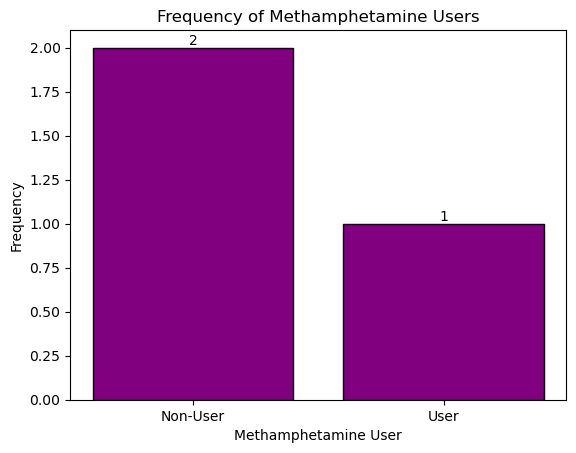

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Verify column existence and data types
print(df[['Cscore', 'Impulsive']].dtypes)

# Check for any missing values in the columns
print(df[['Cscore', 'Impulsive']].isnull().sum())

# Create a copy of the DataFrame
meth_df = df.copy()

# Create the 'Methamphetamine_User' column
meth_df['Methamphetamine_User'] = meth_df[['Cscore', 'Impulsive']].apply(
    lambda x: 1 if x['Cscore'] > 0.5 or x['Impulsive'] > 0.8 else 0,
    axis=1
)

# Verify the column names in the DataFrame
print(meth_df.columns)

# Verify the presence of the 'Methamphetamine_User' column
print('Methamphetamine_User' in meth_df.columns)

# Count the frequency of Methamphetamine users
user_counts = meth_df['Methamphetamine_User'].value_counts()

# Create the bar plot with value annotations
fig, ax = plt.subplots()
bars = ax.bar(user_counts.index, user_counts.values, color='purple', edgecolor='black')

# Add value annotations to the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.xlabel('Methamphetamine User')
plt.ylabel('Frequency')
plt.title('Frequency of Methamphetamine Users')
plt.xticks(user_counts.index, ['Non-User', 'User'])
plt.show()

# Conclusion 

######  Overall we see that our Logistic Regression, Random Forest Classifiers, and SVM's performed the best. The models performed best when classifying Cocaine and Nicotine. Although, this is probably due to the much larger sample size from these drugs compared to Heroin.